# Partial Molar Entropy

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [31]:
alpha = np.linspace(0.0, 1.0, num=1001, endpoint=False)
alpha = alpha[1:]

normalized_entropy = - 1 / alpha * (alpha * np.log(alpha)
                                 + (1 - alpha) * np.log(1 - alpha))
partial_molar_entropy = - np.log(alpha / (1 - alpha))

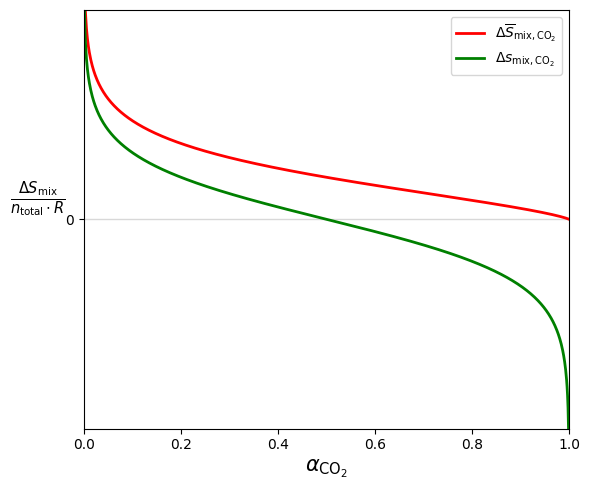

In [50]:
#| label: specific_vs_partial_molar_entropy

fig, ax = plt.subplots(figsize=(6, 5))

ax.axhline(y=0, lw=1, c="grey", alpha=0.3)
ax.plot(alpha, normalized_entropy, c="r", lw=2,
        label=r"$\Delta \overline{S}_{\mathrm{mix}, \mathrm{CO}_2}$")
ax.plot(alpha, partial_molar_entropy, c="g", lw=2,
        label=r"$\Delta s_{\mathrm{mix}, \mathrm{CO}_2}$")
ax.set_xlabel(r"$\alpha_{\mathrm{CO}_2}$", fontsize=15)
ax.set_ylabel(r"$\frac{\Delta S_{\mathrm{mix}}}{n_{\mathrm{total}}\cdot R}$",
              fontsize=15, labelpad=20, rotation=0,)
ax.set_xlim((0, 1))
ax.set_ylim((np.min(partial_molar_entropy), np.max(partial_molar_entropy)))
ax.set_yticks(np.atleast_1d(0))
ax.legend()
plt.tight_layout()
plt.show()

In [70]:
#| label: specific_vs_partial_molar

# --- Define the function and derivative ---
def y_func(x):
    return -(x*np.log(x) + (1-x)*np.log(1-x))

def dy_dx(x):
    return -np.log(x/(1.0 - x))

# --- Sample points for the main red curve ---
x_vals = np.linspace(0.001, 0.999, 200)
y_vals = y_func(x_vals)

# --- Choose slider positions for x in (0,1) ---
slider_xs = np.linspace(0.001, 0.999, 30)

##############################################
# 1) Initial value so everything shows at start
##############################################
x_init = slider_xs[0]
y_init = y_func(x_init)
slope_init = dy_dx(x_init)

xtan_init = np.linspace(0, 1, 50)
ytan_init = y_init + slope_init*(xtan_init - x_init)
xspec_init = [0, x_init]
yspec_init = [0, y_init]

##############################################
# 2) Base figure with 4 traces
##############################################
fig = go.Figure(
    data=[
        # Trace 0: main curve (red)
        go.Scatter(
            x=x_vals,
            y=y_vals,
            mode='lines',
            line=dict(color='red'),
            name='Function'
        ),
        # Trace 1: black dot
        go.Scatter(
            x=[x_init],
            y=[y_init],
            mode='markers',
            marker=dict(color='black', size=8),
            name='Current Point'
        ),
        # Trace 2: tangent line
        go.Scatter(
            x=xtan_init,
            y=ytan_init,
            mode='lines',
            line=dict(color='black', dash='dash'),
            name='Partial Molar (Tangent)'
        ),
        # Trace 3: specific line
        go.Scatter(
            x=xspec_init,
            y=yspec_init,
            mode='lines',
            line=dict(color='blue', dash='dash'),
            name='Specific'
        ),
    ],
    layout=go.Layout(
        # Remove/empty the main title
        title="",
        xaxis=dict(range=[0,1], title='X'),
        yaxis=dict(range=[0,0.7], title='Y'),
        # Make the legend horizontal and place it at the top
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
)

##############################################
# 3) Frames for animation
##############################################
frames = []
steps = []

for xv in slider_xs:
    yv = y_func(xv)
    slope = dy_dx(xv)

    xtan = np.linspace(0, 1, 50)
    ytan = yv + slope*(xtan - xv)
    xspec = [0, xv]
    yspec = [0, yv]

    frame_name = f"x={xv:.2f}"

    frame_data = [
        {},  # keep the red curve
        dict(x=[xv], y=[yv]),    # black dot
        dict(x=xtan, y=ytan),    # tangent
        dict(x=xspec, y=yspec),  # specific line
    ]

    frames.append(go.Frame(data=frame_data, name=frame_name))

    steps.append(
        dict(
            method="animate",
            label=frame_name,
            args=[
                [frame_name],
                dict(frame=dict(duration=0, redraw=True),
                     mode="immediate",
                     transition=dict(duration=0))
            ]
        )
    )

fig.frames = frames

##############################################
# 4) Slider & "Play" button
##############################################
fig.update_layout(
    template="simple_white",
    width=700,
    height=500,
    yaxis=dict(range=[0, 1]),
    sliders=[
        dict(
            active=0,
            steps=steps,
            x=0,
            y=0,
            xanchor="left",
            yanchor="top",
            pad=dict(t=50),
            currentvalue=dict(
                visible=True,
                # prefix="x = ",
                xanchor="right"
            )
        )
    ]
)

fig.show()
